In [99]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import math

import seaborn as sns

In [100]:
train_df = pd.read_csv('kc_house_data_train.csv')
test_df = pd.read_csv('kc_house_data_test_features.csv')

In [69]:
train_df.keys()

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [101]:
bedrooms_filt = train_df['bedrooms'] < 15
train_df['bedrooms'] = np.where(bedrooms_filt, train_df['bedrooms'], np.nan)

In [102]:
train_df['bedrooms'].value_counts()

3.0     7864
4.0     5488
2.0     2204
5.0     1283
6.0      229
1.0      160
7.0       30
0.0       12
8.0       10
9.0        5
10.0       3
11.0       1
Name: bedrooms_adj, dtype: int64

In [98]:
train_df[train_df['bedrooms'] == np.nan]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [91]:
features = list(train_df.keys())
remove_features = ['Unnamed: 0', 'id', 'date', 'price', 'zipcode', 'lat', 'long', 'yr_built', 'yr_renovated']
for f in remove_features:
    features.remove(f)

In [92]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15']

In [93]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

In [ ]:
stats.ttest_

In [97]:
model = ols(formula='price~bedrooms+sqft_lot+bathrooms+floors+grade+yr_built+yr_renovated+sqft_above+sqft_basement+view+waterfront', data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2943.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:31:10   Log-Likelihood:            -2.3723e+05
No. Observations:               17289   AIC:                         4.745e+05
Df Residuals:                   17277   BIC:                         4.746e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.652e+06   1.46e+05     45.464      0.000    6.37e+06    6.94e+06
bedrooms      -4.223e+04   2377.409    -17.763      0.000   -4.69e+04   -3.76e+04
sqft_lot         -0.2414      0.041     -5.920      0.000      -0.321      -0.161
bathrooms      4.857e+04   3962.574     12.257      0.000    4.08e+04    5.63e+04
floors         1.975e+04   4236.625      4.662      0.000    1.14e+04    2.81e+04
grade           1.24e+05   2468.493     50.249      0.000    1.19e+05    1.29e+05
yr_built      -3771.0803     76.788    -49.110      0.000   -3921.592   -3620.568
yr_renovated      0.9302      4.405      0.211      0.833      -7.703       9.564
sqft_above      177.3181      4.003     44.302      0.000     169.473     185.163
sqft_basement   179.6659      5.221     34.410      0.000     169.432     189.900
view           4.467e+04   2541.263     17.578      0.000    3.97e+04    4.97e+04
waterfront     5.848e+05   2.07e+04     28.232      0.000    5.44e+05    6.25e+05
==============================================================================
Omnibus:                    13294.859   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1009910.204
Skew:                           3.102   Prob(JB):                         0.00
Kurtosis:                      39.925   Cond. No.                     3.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

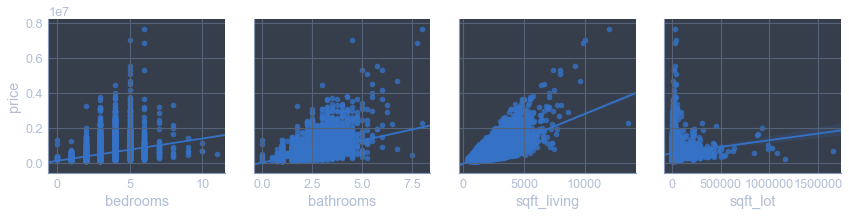

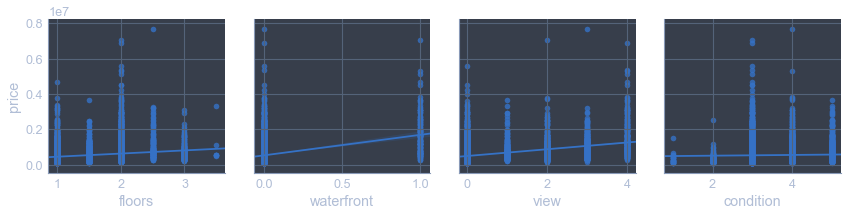

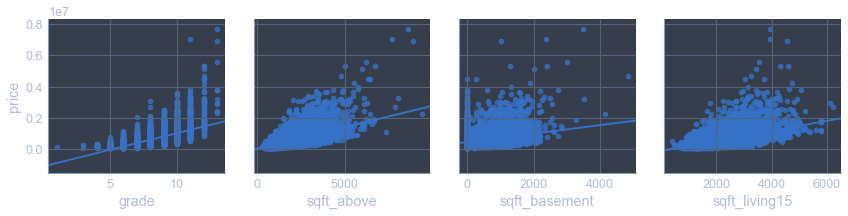

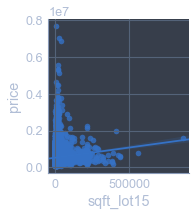

In [94]:
for i in row_groups:
    pp = sns.pairplot(data=train_df, y_vars=['price'],x_vars=i, kind="reg", height=3)